# COMP3221 - Distributed Systems 

## Tutorial 05 - Distributed Optimization

**Objectives:**

* To understand the basics of gradient descent and distributed gradient descent with Linear Regression and Multiclass Logistic Regression.

**Instructions:**
* Exercises tend to be completed by **Python 3** programming language.
* You can either use IPython notebook or just python files to finish the exercises. 
* To install IPython notebooks and Python 3, you can: 
   * Use IPython 3 (Jupyter) notebook installed on your computer: http://jupyter.org/install (you need to have Python installed first: https://docs.python.org/3/using/index.html )
   * Use Web-based IPython notebooks such as Google Colaboratory: https://colab.research.google.com/   
* Using the IPython notebook:
  * If you are using Jupyter intalled on your computer, Go to *File -> Open*. Drag and drop the "*.ipynb*" file to the home interface and click upload. 
  * If you are using Google Colaboratory, Click *File -> Upload notebook*, and upload the "*.ipynb*" file.
  * To run the code cells you can press *Ctrl-Enter* or hit the *Play* button at the top.
* Using python files:
  * We recommend using Visual Studio Code as IDE: https://code.visualstudio.com/
  
* Please complete all exercises marked with **TODO**.
* Make sure to save your files when you are done with the exercises, so you can show your tutor next week.

## 0. Setup

Import some basic libraries

In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg as LA

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

np.random.seed(123)
%matplotlib inline

## 1. Linear Regression

Linear regression can be used to make predictions about a continuous target variable, using a set of predictor variables. We'll refer to those predictions as $y$, where: 
$$y = \underbrace{X}_{m\times n}\cdot \underbrace{w}_{n\times 1}$$




and $X$ is a matrix of $m$ observations, each observation composed of $n$ predictor variables. Additionally, $w$ is a vector of $n$ _weights_ (aka coefficients). 

In machine learning, gradient descent iteratively updates the weights to minimize some loss function. The loss function's job is to tell us how wrong our weights are at any given step of the algorithm. For linear regression, our loss function is the mean squared error (MSE):
 $$MSE = \frac{1}{2N} ||y - Xw||^2 $$

### 1.1 Generate a linear synthetic data

Since we focus on the Linear Regression algorithm, we'll  generate a dataset $(X,y)$ that is amenable to a linear function.

In [ ]:
X = np.random.rand(5000)
y = 4 + 3 * X + .5*np.random.randn(5000)

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

one = np.ones((xTrain.shape[0],1))
xTrainbar = np.concatenate((one, xTrain.reshape(-1, 1)), axis = 1)

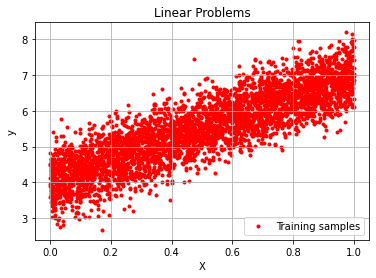

In [ ]:
import matplotlib.pylab as pl
%matplotlib inline

# Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
pl.scatter(xTrainbar[:,1], yTrain,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('X')
pl.ylabel('y')
pl.legend(loc='lower right')
plt.title('Linear Problems')
pl.grid()
pl.show()

### 1.2. Solving Linear Regression model

#### 1.2.1 Closed-form solution:

With the Closed-form solution, we can obtain the optimal parameters for the Linear Regression algorithm by just using a formula that includes a few matrix multiplications and inversions.

* Closed-form solution: $w = (X^TX)^{-1}X^Ty$

**TASK: Finding the closed-form solution. Discuss Pros and Cons of this method**

In [ ]:
A = np.dot(xTrainbar.T, xTrainbar)
b = np.dot(xTrainbar.T, yTrain)
wCF = np.dot(np.linalg.pinv(A), b)
print("Direct Solution:",wCF)

Direct Solution: [4.0137594  2.98708128]


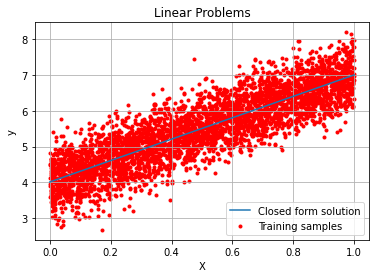

In [ ]:
import matplotlib.pylab as pl
%matplotlib inline

w_0 = wCF[0]
w_1 = wCF[1]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0
plt.plot(x0, y0, label = 'Closed form solution')  
# Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
pl.scatter(xTrainbar[:,1], yTrain,marker='.', color = 'r', label = 'Training samples')
pl.xlabel('X')
pl.ylabel('y')
pl.legend(loc='lower right')
plt.title('Linear Problems')
pl.grid()
pl.show()

#### 1.2.2 Finding solution using Gradient Descent:
Gradient Descent is an iterative algorithm meaning that you need to take multiple steps to get to the global optimum (to find the optimal parameters). Steps to do Gradient Descent:

* Initialize $w =  w^{(0)}$ randomly:
* Choose learning rate $ \eta> 0$
*  Loop until convergence:

    Compute Gradient: $\nabla mse(w) = \frac{1}{N}X^T(Xw^t-y)$
    
    Update parameters: $w^{t+1} = w^t - \eta * \nabla mse(w)$

In our implementation, we will define a number of `iterations` which updates to `w`.

In [ ]:
# get all sample for each interation
def gradient_descent(x, y, w, iterations, eta):
    past_loss = []
    past_w = [w]
    n = y.size
    for i in range(iterations):
        prediction = np.dot(x, w)
        error = prediction - y
        loss = 1/(2*n) * np.dot(error.T, error)
        past_loss.append(loss)
        
        GradRmse = np.dot(x.T, error)
        w = w - (eta * (1/n) * GradRmse)
        past_w.append(w)
        
    return past_w, past_loss

[4.02685916 2.96241017]
0.12702784179001783


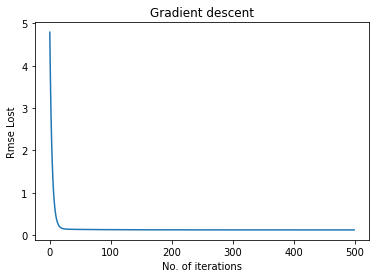

In [ ]:
eta = 0.1 # Learning Rate
iterations = 500 # No. of iterations
w_init = np.array([2, 1])
(wGD, pastLoss) = gradient_descent(xTrainbar,yTrain, w_init, iterations, eta)
print(wGD[-1])
print(pastLoss[-1])
plt.title('Gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('Rmse Lost')
plt.plot(pastLoss)
plt.show()

Let compare with solution from Sklean and the closed-form solution

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(0)
model.fit(xTrain.reshape(-1, 1), yTrain.reshape(-1, 1))
wSK, b = model.coef_[0][0], model.intercept_[0] 
sol_sklearn = np.array([b, wSK])
print(sol_sklearn)

[4.0137594  2.98708128]


The solutions from gradient descent, closed-form, sklearn are similar!

## 2. Multi-Class Logistic Regression (MCLR)

Multi-class logistic regression (multinomial logistic regression or softmax regression) is a generalization of binary logistic regression that predicts a multinomial probability (i.e. more than two classes) for each input example.

### 2.1. Softmax function and cross entropy loss

As the name suggests, in MCLR, we replace the sigmoid logistic function by the so-called softmax function. This softmax function computes the probability that a training sample belongs to a class given the weight and the input.

**2.1.1 Definition of Softmax function:**

With K different classes {1, ..., K},
$$
h_w(X) = p(y = k|X;w_1,...,w_k) = \frac{\exp(w_k^TX)}{\sum_{k=1}^K \exp(w_k^TX)} 
%- y_j = \mathrm{softmax}(\mathbf{o})_j - y_j = \Pr(c = 1|x) - y_j
$$

where $w$ is the weight vector, $X$ is the training samples.

**Exercise 2.1.1:** Define SoftMax function.

In [ ]:
def softmax(X, W):
    Z = X.dot(W)
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

**1.2 Definition of Cross entropy function and its derivative:**

The MCLR model will be fit using cross-entropy loss and will predict the integer value for each integer encoded class label.

$$
f(w) = \frac{-1}{N}{\sum_{n=1}^N\sum_{k=1}^K y_{nk}\log \frac{\exp(w_k^Tx_n)}{\sum_{k=1}^K \exp(w_k^Tx_n)}} 
%- y_j = \mathrm{softmax}(\mathbf{o})_j - y_j = \Pr(c = 1|x) - y_j
$$

$$
\nabla f(w) = \sum_{n=1}^N(h_w(x^{n}) - y^{n})x^{n}
$$

In [ ]:
def softmax_loss(X, y, W):
    A = softmax(X,W)
    id0 = range(X.shape[0])
    return -np.mean(np.log(A[id0, y]))

def softmax_grad(X, y, W):
    pred = softmax(X,W)  
    xid = range(X.shape[0])   # number of train data
    pred[xid, y] -= 1         # predict - Y, shape of (N, C)
    return X.T.dot(pred)/X.shape[0]

### 2.2 Gradient Descent for MCLR
$$
w_{j+1} \leftarrow w_j - \frac{\alpha}{N} (\sum_{n=1}^N(h_{w_j}(x^{n}) - y^{n})x^{n})
$$


In [ ]:
def softmax_fit(X, y, W, lr = 0.01, nepoches = 100, tol = 1e-5):
    W_old = W.copy()
    ep = 0 
    loss_hist = [softmax_loss(X, y, W)] # store history of loss 
    N = X.shape[0]
    while ep < nepoches: 
        ep += 1 
        W -= lr*softmax_grad(X, y, W)
        loss_hist.append(softmax_loss(X, y, W))
        if np.linalg.norm(W - W_old)/W.size < tol:
            break 
        W_old = W.copy()
    return W, loss_hist 

def pred(W, X):
    A = softmax(X,W)
    return np.argmax(A, axis = 1)

def accurancy(y_pre,y):
    count = y_pre == y
    total = count.sum()
    accurancy = count.sum()/len(count)
    return accurancy

### 2.3. Evaluation MCLR on simple synthetic dataset

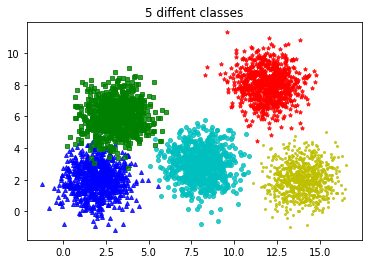

In [ ]:
C = 5    # number of classes
N = 800  # number of points per class 
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)

X = np.concatenate((X0, X1, X2, X3, X4), axis = 0) # each row is a datapoint
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1) # bias trick 
y = np.asarray([0]*N + [1]*N + [2]*N+ [3]*N + [4]*N)

def display(X, label):
    X0 = X[np.where(label == 0)[0]]
    X1 = X[np.where(label == 1)[0]]
    X2 = X[np.where(label == 2)[0]]
    X3 = X[np.where(label == 3)[0]]
    X4 = X[np.where(label == 4)[0]]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'co', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'gs', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'y.', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 'r*', markersize = 4, alpha = .8)
    plt.plot()
    
display(X,y)
plt.title("5 diffent classes")
plt.show()

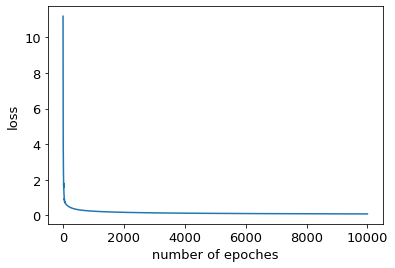

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xbar, y, test_size=0.33, random_state=42)
np.random.seed(123)
W_init = np.random.randn(Xbar.shape[1], C)
W, loss_hist = softmax_fit(X_train, y_train, W_init, nepoches = 10000, lr = 0.1)
    
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize = 13)
plt.ylabel('loss', fontsize = 13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

value of  [0 0 0 ... 4 4 4]


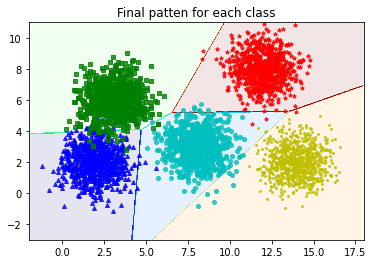

In [ ]:
xm = np.arange(-2, 18, 0.025)
xlen = len(xm)
ym = np.arange(-3, 11, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
xx1 = xx.ravel().reshape(-1, 1)
yy1 = yy.ravel().reshape(-1, 1)
XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)
Z = pred(W, XX)
print("value of ", Z)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
plt.xlim(-2, 18)
plt.ylim(-3, 11)
plt.title("Final patten for each class")
display(X, y)
plt.show()

## 3. Distributed Gradient Descent for Linear Regression
Assuming we have 5 users, we distribute the original data to 5 users.

In [ ]:
numUser = 5
uListTrain = []
uListTest = []
uTrainLen = len(xTrain)//numUser
uTestLen = len(xTest)//numUser
for i in range(numUser):
    uListTrain.append(np.c_[xTrain[uTrainLen*i:uTrainLen*(i+1)], yTrain[uTrainLen*i:uTrainLen*(i+1)]])
    uListTest.append(np.c_[xTest[uTestLen*i:uTestLen*(i+1)], yTest[uTestLen*i:uTestLen*(i+1)]])

Implementation for distributed gradient descent

In [ ]:
def distributed_gradient_descent(uListTrain, w, iterations, eta):
    past_loss = []
    past_w = [w]
    for i in range(iterations):
        # find w with respect to each users
        GradRmse = np.zeros(len(w))
        loss = 0
        for user in uListTrain:
            x, y = zip(*user)
            x, y = np.array(x).reshape(len(x),1), np.array(y)
            x = np.c_[np.ones(x.shape[0]), x]
            n = len(y)
            prediction = np.dot(x, w)
            error = prediction - y
            loss += 1/(2*n) * np.dot(error.T, error)
            GradRmse += (1/n) *np.dot(x.T, error)
        past_loss.append(loss)
        w = w - (eta * GradRmse)
        past_w.append(w)
        
    return past_w, past_loss

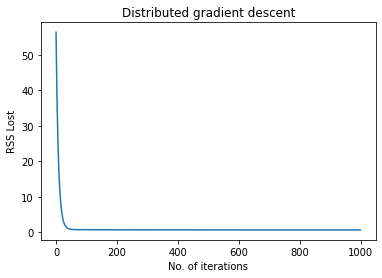

In [ ]:
# Pass the relevant variables to the function and get the new values back...
eta = 0.01 # Learning Rate
iterations = 1000 # No. of iterations
np.random.seed(123)
w0 = np.random.rand(2) # Pick some random values to start with
wDis, pastLoss = distributed_gradient_descent(uListTrain, w0, iterations, eta)
# Plot the cost function...
plt.title('Distributed gradient descent')
plt.xlabel('No. of iterations')
plt.ylabel('RSS Lost')
plt.plot(pastLoss)
plt.show()

In [ ]:
print(wDis[-1])

[4.02724539 2.96168277]
